In [1]:
import Pkg; Pkg.add("QuadGK")
using Plots
using Polynomials
using QuadGK

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [2]:
function legendr(k)
    if k == 0
        return Poly([1])
    end
    if k == 1
        return Poly([0,1])
    end
    ((2k-1)/(k))*Poly([0,1])*legendr(k-1) - (k-1)/(k)*legendr(k-2)
end

legendr (generic function with 1 method)

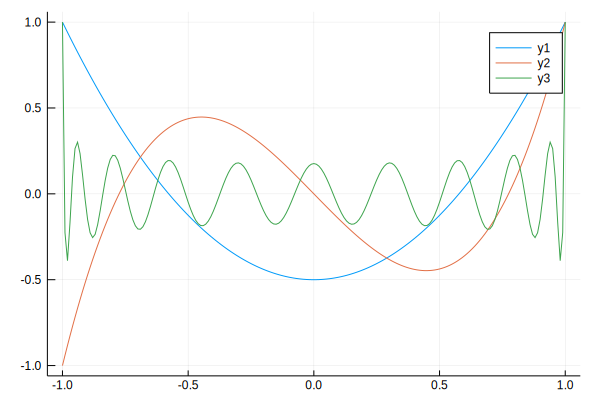

In [3]:
x = -1:0.01:1
y = [legendr(2)(x1) for x1 in x]
plot(x,y)
y = [legendr(3)(x1) for x1 in x]
plot!(x,y)
y = [legendr(20)(x1) for x1 in x]
plot!(x,y)

In [4]:
(xp,a)=gauss(Float64, 2)

([-0.57735, 0.57735], [1.0, 1.0])

In [5]:
roots(legendr(2))

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

In [6]:
(xp,a)=gauss(Float64, 3)

([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])

In [9]:
roots(legendr(3))

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414833
  0.0               

In [10]:
(xp,a)=gauss(Float64, 4)

([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

In [11]:
roots(legendr(4))

4-element Array{Float64,1}:
 -0.8611363115940536 
  0.8611363115940531 
 -0.33998104358485653
  0.3399810435848563 

In [12]:
function integral(k, f)
    (xp,a)=gauss(Float64, k)
    sum(a .* f.(xp))
end

integral (generic function with 1 method)

In [13]:
f(x) = 3*x^4
println( integral(6, f) )
quadgk(f, -1, 1)

1.2000000000000006


(1.1999999999999997, 2.220446049250313e-16)

In [14]:
f(x) = 50*x^8 + 4*x^6 + 5*x^4
println( integral(5, f) )
println( quadgk(f, -1, 1) )
100 * abs((integral(5, f) - quadgk(f, -1, 1)[1]) / quadgk(f, -1, 1)[1])

14.253968253968258
(14.253968253968251, 3.552713678800501e-15)


4.9848766539962496e-14

In [15]:
f(x) = 50*x^10 + 4*x^6 + 5*x^4
println( integral(5, f) )
println( quadgk(f, -1, 1) )
100 * abs((integral(5, f) - quadgk(f, -1, 1)[1]) / quadgk(f, -1, 1)[1])

12.087175610985136
(12.233766233766227, 0.0)


1.198246067318893

In [25]:
function integral(k, f, a, b)
    (xp, p)=gauss(Float64, k)
    
    x = [ ((b+a)/2) + ((b-a)/2) * x1 for x1 in xp]
    
    sum(p .* f.(x)) * ((b-a)/2)
end

integral (generic function with 2 methods)

In [32]:
f(x) = x^2
print(integral(10, f, 0, 5))
quadgk(f, 0, 5)
# 41.66666666666666

41.66666666666668

(41.66666666666666, 0.0)

In [33]:
f(x) = x^3
print(integral(10, f, -2, 2))
quadgk(f, -2, 2)
# 

4.440892098500626e-16

(-4.440892098500626e-16, 0.0)

In [34]:
f(x) = x^4 + 5*x^2 + 2*x + 5
print(integral(10, f, 0, 5))
quadgk(f, 0, 5)
# 883.3333333333333

883.3333333333336

(883.3333333333333, 0.0)

In [35]:
f(x) = sin(x)
print(integral(5, f, 0, pi))
quadgk(f, 0, pi)
# 2

2.0000001102844713

(2.0, 1.7905676941154525e-12)

In [36]:
f(x) = x^4 + 5*x^2 + 2*x + 5
quadgk(f, 0, 5)

(883.3333333333333, 0.0)

In [37]:
f(x) = ( 1 / sqrt(2*pi) ) * exp( (-x^2) / 2 )
quadgk(f, -Inf, +Inf)

(1.0000000000032583, 1.4395584941504537e-8)

In [38]:
function trapezIntegral(k, f, a, b)
    l = (b-a) / k
    xp = [a + (b-a) * (i/k) for i in range(0, k)]
    yp = [ ( f(xp[i]) + f(xp[i+1]) ) / 2 for i in range(1, size(xp,1) - 1 )]
    sum(yp) * l
end

trapezIntegral (generic function with 1 method)

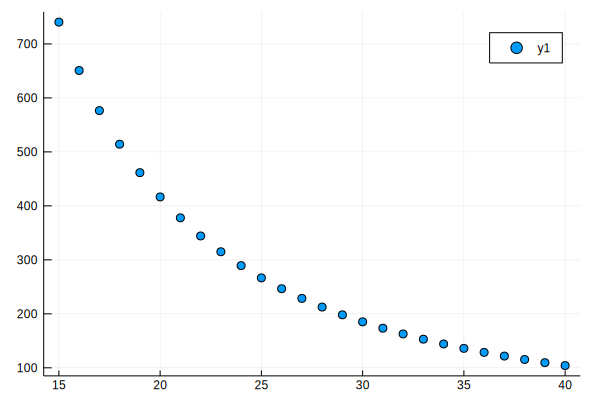

In [40]:
f(x) = 5 * x^4
F(x) = x^5

k = 15:40
err = [trapezIntegral(k1, f, 0, 10) - (F(10) - F(0)) for k1 in k]
scatter(k, err)